# Cuaderno para generar datos 


In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit,least_squares

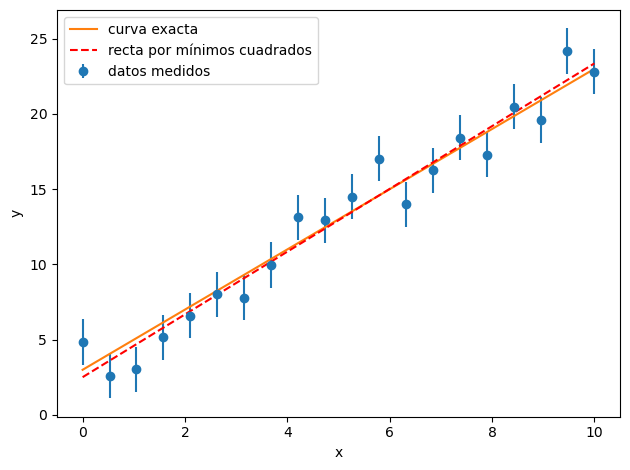

In [8]:
# Vamos a generar un conjunto de datos ficticios para 
# luego hacer una aproximación por mínimos cuadradosamos los datos 
# En el eje x, 20 valores equiespaciados entre 0 y 10
# Definir los parámetros del modelo
m = 2.0  # Pendiente
b = 3.0  # Término independiente
# Generar datos ficticios
x_datos = np.linspace(0, 10, 20)
y_exacto = m * x_datos + b
# Introducimos un poco de ruido 
np.random.seed(1900)
y_ruido = 1.5 * np.random.normal(size=x_datos.size)
y_datos = y_exacto + y_ruido
# Calcular incertidumbre (en este caso, usando un valor fijo para la simplicidad)
incertidumbre_y = 1.5  # Puedes ajustar este valor según tus necesidades
# Graficar los datos con barras de error
plt.figure()
plt.errorbar(x_datos, y_datos, yerr=incertidumbre_y, fmt='o', label='datos medidos')
# Graficar la curva exacta
plt.plot(x_datos, y_exacto, '-', label='curva exacta')

# Ajustar la recta por mínimos cuadrados
A = np.vstack([x_datos, np.ones(len(x_datos))]).T
m_cua, b_cua = np.linalg.lstsq(A, y_datos, rcond=None)[0]

# Graficar la recta por mínimos cuadrados
plt.plot(x_datos, m_cua * x_datos + b_cua, 'r--', label='recta por mínimos cuadrados')

# Añadir leyenda y etiquetas de ejes
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

# Ajustar el diseño del gráfico
plt.tight_layout()
# Guardar la figura (si se desea)
# plt.savefig('datos-con-incertidumbre.png', dpi=150)
# Mostrar la gráfica
plt.show()

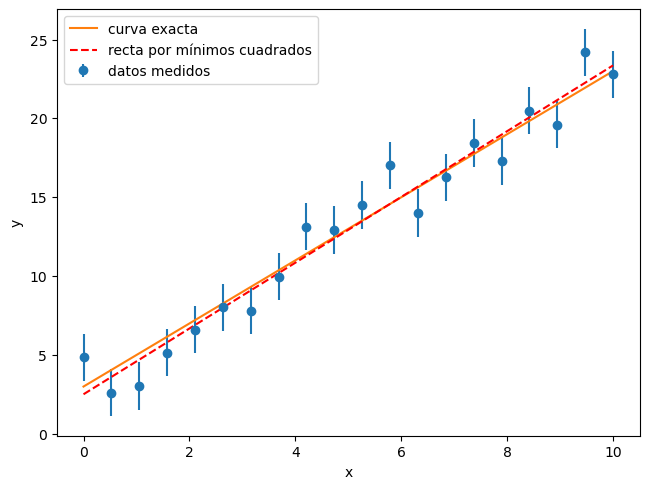

In [3]:
# Vamos a generar un conjunto de datos ficticios para 
# luego hacer una aproximación por mínimos cuadradosamos los datos 
# En el eje x, 20 valores equiespaciados entre 0 y 10
# Definir los parámetros del modelo
m = 2.0  # Pendiente
b = 3.0  # Término independiente

# Generar datos ficticios
x_datos = np.linspace(0, 10, 20)
y_exacto = m * x_datos + b

# Introducimos un poco de ruido 
np.random.seed(1900)
y_ruido = 1.5 * np.random.normal(size=x_datos.size)
y_datos = y_exacto + y_ruido

# Calcular incertidumbre (en este caso, usando un valor fijo para la simplicidad)
incertidumbre_y = 1.5  # Puedes ajustar este valor según tus necesidades

# Graficar los datos con barras de error
plt.figure()
plt.errorbar(x_datos, y_datos, yerr=incertidumbre_y, fmt='o', label='datos medidos')

# Graficar la curva exacta
plt.plot(x_datos, y_exacto, '-', label='curva exacta')

# Ajustar el diseño del gráfico
plt.tight_layout()

# Ajustar la recta por mínimos cuadrados
A = np.vstack([x_datos, np.ones(len(x_datos))]).T
m_cua, b_cua = np.linalg.lstsq(A, y_datos, rcond=None)[0]

# Graficar la recta por mínimos cuadrados
plt.plot(x_datos, m_cua * x_datos + b_cua, 'r--', label='recta por mínimos cuadrados')

# Añadir leyenda y etiquetas de ejes
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

# Mostrar la gráfica
plt.show()

In [9]:
# Calcular los errores estándar de los coeficientes
residuals = y_datos - (m_cua * x_datos + b_cua)
mse = np.sum(residuals ** 2) / (len(x_datos) - 2)  # Error cuadrático medio
variance = np.var(x_datos, ddof=1)  # Varianza de x_datos
m_error = np.sqrt(mse / np.sum((x_datos - np.mean(x_datos)) ** 2))
b_error = np.sqrt(mse * (1 / len(x_datos) + np.mean(x_datos) ** 2 / np.sum((x_datos - np.mean(x_datos)) ** 2)))

print("Error en la pendiente:", m_error)
print("Error en el término independiente:", b_error)

Error en la pendiente: 0.10267907995840296
Error en el término independiente: 0.6005675276339026


In [32]:
print(f'm = {np.round(m_cua, 1)} \u00B1 {np.round(m_error, 1)}')

m = 2.1 ± 0.1


In [33]:
print(f'b = {np.round(b_cua, 1)} \u00B1 {np.round(b_error, 1)}')

b = 2.5 ± 0.6


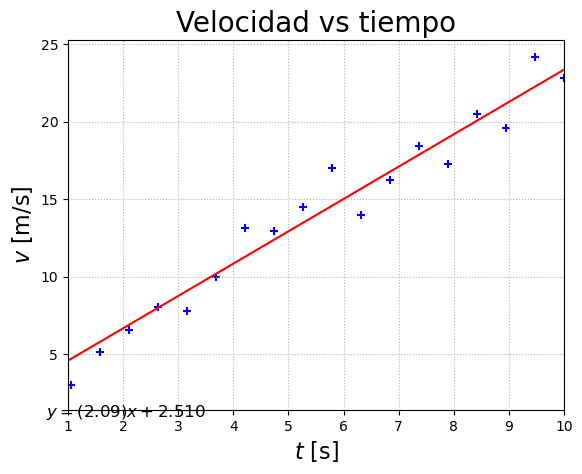

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
xn= x_datos
yn= y_datos
#yn = np.array([1.000, 1.64, 1.51, 2.03, 2.75, 3.59, 4.87, 5.23, 5.44, 6.37])
#xn = np.array([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 1.00])

# Cálculos intermedios
n = len(xn)
Sum_x = np.sum(xn)
Sum_y = np.sum(yn)
Sum_xx = np.sum(xn**2)
Sum_xy = np.sum(xn*yn)
Delta = n * np.sum(xn**2) - np.sum(xn)**2

# Coeficientes de la recta de mejor ajuste
b = (Sum_xx * Sum_y - Sum_xy * Sum_x) / Delta
m = (n * Sum_xy - Sum_x * Sum_y) / Delta

#print('m =', m, ', b =', b)

# Gráfica de los datos y la recta ajustada
x = xn
y = m * x + b

plt.scatter(xn, yn, color='b', marker='+')
plt.plot(x, y, color='r')
plt.grid(linestyle='dotted')
plt.title(r'Velocidad vs tiempo', fontsize=20)
plt.xlabel(r'$t$ [s]', fontsize=16)
plt.ylabel(r'$v$ [m/s]', fontsize=16)
plt.xlim(1, 10)
plt.text(0.6, 1.0, r'$y = ({:.2f})x + {:.3f}$'.format(m, b), fontsize=12)
plt.show()

# Cálculo de los errores estándar
Sum_d = np.sum(yn - b - m * xn)
Sy = np.sqrt(Sum_d / (n - 2))
Dm = (n / Delta) ** 0.5 * Sy
Db = (Sum_xx / Delta) ** 0.5 * Sy
#print('Dm =', Dm, ', Db =', Db)


In [38]:
print(f'm = {np.round(m_cua, 1)} \u00B1 {np.round(Dm, 4)}')

m = 2.1 ± 0.0


In [40]:
print(f'b = {np.round(b, 1)} \u00B1 {np.round(Db, 1)}')

b = 2.5 ± 0.0


In [ ]:
# Vamos a generar un conjunto de datos ficticios para 
# luego hacer una aproximación por mínimos cuadradosamos los datos 
# En el eje x, 20 valores equiespaciados entre 0 y 10
x_datos  = np.linspace(0, 10, 20)
# En el eje y, la recta calculada a partir de x_datos
y_exacto = 5.0*x_datos+1.0
# Agregamos un poco "ruido" para darle realismo
np.random.seed(1900)
# Ruido con distribución normal escalado a 1.5
y_ruido = 1.5 * np.random.normal(size=x_datos.size)
# Agregamos el ruido para tener la serie de datos de y que simula ser
# el resultadod e un experimento
y_datos = y_exacto + y_ruido
# Esta es la comparación entre los valoers exatos del fenómeno que uno desea 
# analizar y los que "logramos medir", con el ruido incluido.
plt.figure()
plt.plot(x_datos,  y_datos, 'o', label='datos medidos')
plt.plot(x_datos, y_exacto, '-', label='curva exacta')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
# plt.savefig('datos-originales.png',dpi=150)

In [ ]:
# Definir los parámetros del modelo
m = 2.0  # Pendiente
b = 3.0  # Término independiente

# Generar datos ficticios
x_datos = np.linspace(0, 10, 20)
y_exacto = m * x_datos + b
np.random.seed(1900)
y_ruido = 1.5 * np.random.normal(size=x_datos.size)
y_datos = y_exacto + y_ruido

# Calcular incertidumbre (en este caso, usando un valor fijo para la simplicidad)
incertidumbre_y = 1.5  # Puedes ajustar este valor según tus necesidades

# Graficar los datos con barras de error
plt.figure()
plt.errorbar(x_datos, y_datos, yerr=incertidumbre_y, fmt='o', label='datos medidos')

# Graficar la curva exacta
plt.plot(x_datos, y_exacto, '-', label='curva exacta')

# Añadir leyenda y etiquetas de ejes
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

# Ajustar el diseño del gráfico
plt.tight_layout()

# Guardar la figura (si se desea)
# plt.savefig('datos-con-incertidumbre.png', dpi=150)

# Mostrar la gráfica
plt.show()

In [ ]:
y_datos

In [ ]:
x_datos

In [ ]:
m = 2.0  # Pendiente
b = 1.0  # Término independiente
# Generar datos ficticios
x_datos = np.linspace(0, 10, 20)
x_datos = np.around(x_datos, decimals=2)  # Redondear a dos decimales
y_exacto = m*x_datos + b
np.random.seed(1800)
y_ruido = 1.5 * np.random.normal(size=x_datos.size)
y_datos = y_exacto + y_ruido

# Calcular incertidumbre (en este caso, usando un valor fijo para la simplicidad)
incertidumbre_y = 1.0  # Puedes ajustar este valor según tus necesidades

# Graficar los datos con barras de error
plt.figure()
plt.errorbar(x_datos, y_datos, yerr=incertidumbre_y, fmt='o', label='datos medidos')

# Graficar la curva exacta
plt.plot(x_datos, y_exacto, '-', label='curva exacta')

# Añadir leyenda y etiquetas de ejes
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

# Ajustar el diseño del gráfico
plt.tight_layout()

# Guardar la figura (si se desea)
# plt.savefig('datos-con-incertidumbre.png', dpi=150)

# Mostrar la gráfica
plt.show()

In [ ]:
x_datos

In [ ]:
y_datos